In [202]:
from pyabc import History
import matplotlib.pyplot as plt
import numpy as np
import os
from contagion.config import ConfigClass, _baseconfig
from pyabc.visualization import plot_kde_matrix, plot_kde_1d, plot_kde_1d_highlevel


In [214]:
db_path = "sqlite:///" + os.path.join("/scratch4/chaack/", "abc.db")
h_loaded = History(db_path)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f287c87e610>,
      dtype=object)

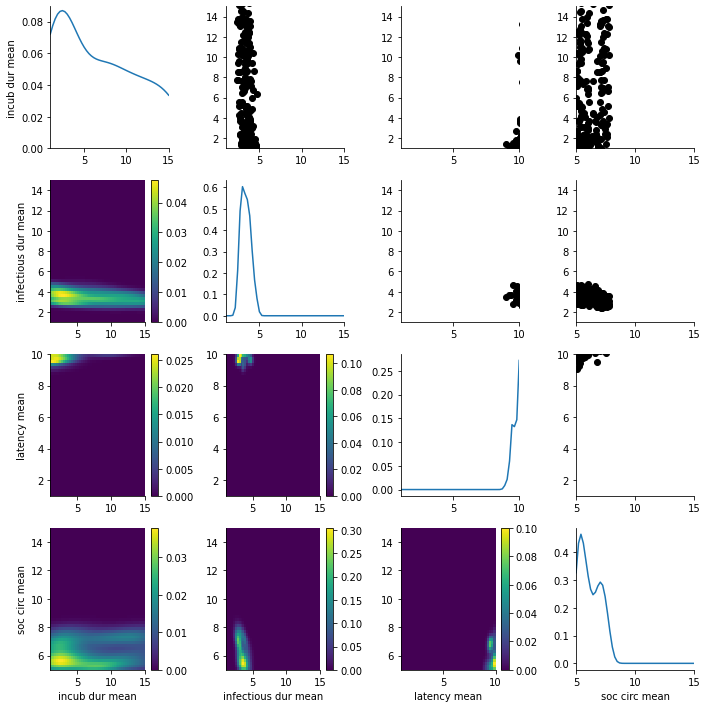

In [215]:
df, w = h_loaded.get_distribution(m=0)
plot_kde_matrix(df, w,
                limits={
                    "latency mean": [1, 10],
                    "soc circ mean": [5, 15],
                    "infectious dur mean": [1, 15],
                    "incub dur mean": [1, 15]})


In [211]:
df, w = h_loaded.get_distribution(m=0,)
par_means = {col: np.average(df[col].values, weights=w )for col in df.columns}
print(par_means)


{'incub dur mean': 7.47804179203349, 'infectious dur mean': 3.3708391476183848, 'latency mean': 9.948436703956514, 'soc circ mean': 7.515315786699297}


KeyError: "None of [Index(['infectious duration mean'], dtype='object', name='name')] are in the [columns]"

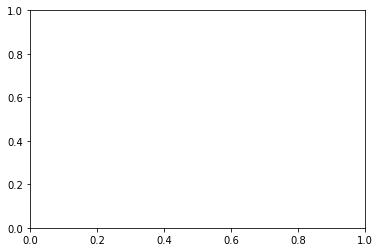

In [151]:
fig, ax = plt.subplots()
for t in range(0, h_loaded.max_t, 3):
    df, w = h_loaded.get_distribution(m=0, t=t)
    plot_kde_1d(
        df, w,
        xmin=0, xmax=10,
        x="infectious duration mean", ax=ax,
        label="PDF t={}".format(t))
#ax.axvline(data["is_infected"], color="k", linestyle="dashed");
#plt.ylim(0, 0.2)
plt.legend()

(0.0, 2.0)

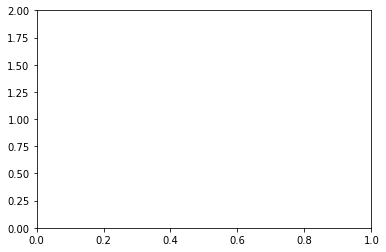

In [145]:
fig, ax = plt.subplots()
for t in range(h_loaded.max_t+1):
    df, w = h_loaded.get_distribution(m=0, t=t)
    plot_kde_1d(df, w, "soc circ mean", xmin=5, xmax=15,
                          ax=ax
                )
plt.ylim(0, 2)

In [142]:
df, w = h_loaded.get_distribution(m=0,)

np.average(df.values[:, 0], weights=w)

6.943604660892234

In [135]:
df.values[0]

array([7.17397346])

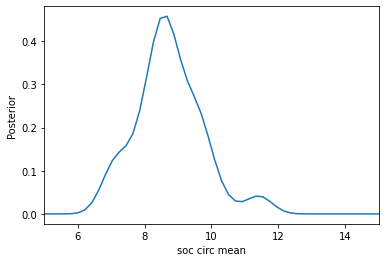

In [105]:
df, w = h_loaded.get_distribution(m=0)

refval = {"latency mean": _baseconfig["infection"]["latency duration pdf"]["mean"],
          "infection mean": _baseconfig["infection"]["infection probability pdf"]["mean"],
          "mortality mean": _baseconfig["infection"]["mortality prob pdf"]["mean"],
          "death mean": _baseconfig["infection"]["time incubation death pdf"]["mean"]
         }

plot_kde_1d_highlevel(h_loaded, "soc circ mean", xmin=5, xmax=15
                )


In [106]:
h_loaded.max_t

3

(0.0, 0.5)

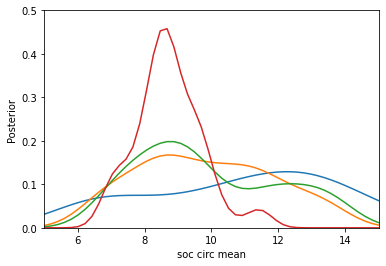

In [108]:
fig, ax = plt.subplots()
for t in range(h_loaded.max_t+1):
    df, w = h_loaded.get_distribution(m=0, t=t)
    plot_kde_1d(df, w, "soc circ mean", xmin=5, xmax=15,
                          ax=ax
                )
plt.ylim(0, 0.5)

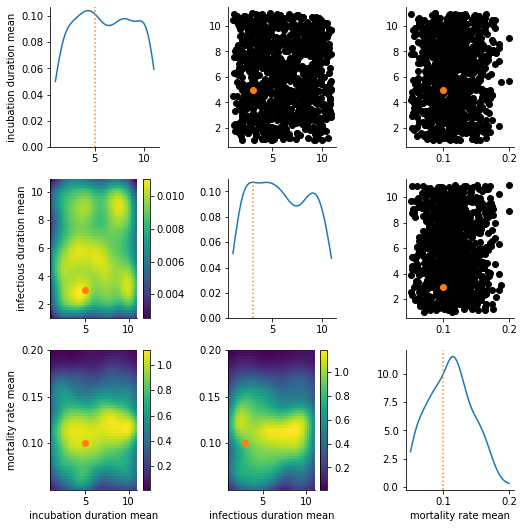

In [67]:
df, w = h_loaded.get_distribution(m=0)
plot_kde_matrix(df, w, refval=_baseconfig);


In [58]:
pyabc.visualization.plot_kde_matrix_highlevel(h_loaded, t=0)
plt.savefig(PICS+"/abc_testrun.png", dpi=150)

NameError: name 'pyabc' is not defined